<a href="https://colab.research.google.com/github/Alebasso01/Brain-Tumor-Predictor/blob/master/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

Before downloading the database from Kaggle directly through code, it is necessary to install the Kaggle dependencies. Also, ensure that you download the API token directly from your account and upload it to the files.

In [ ]:
!pip install kaggle

In [ ]:
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
!mkdir /.kaggle
!mv kaggle.json /.kaggle
!mv /.kaggle /root/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ahmedhamada0/brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection
License(s): copyright-authors
 94% 79.0M/84.0M [00:00<00:00, 102MB/s]
100% 84.0M/84.0M [00:00<00:00, 92.9MB/s]


In [ ]:
%%capture
!unzip brain-tumor-detection.zip

In [ ]:
import os
from shutil import copy2

# Create dataset directory
!mkdir -p /content/dataset

# Source directory path
source_dir = '/content/yes'

# Destination directory path
destination_dir = '/content/dataset/yes'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Read file names from the source directory
file_names = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Shuffle file names randomly
np.random.shuffle(file_names)

# Copy files to the destination directory, maintaining the shuffled order
for file in file_names:
    source = os.path.join(source_dir, file)
    destination = os.path.join(destination_dir, file)
    copy2(source, destination)

print("All images have been copied and shuffled into:", destination_dir)

All images have been copied and shuffled into: /content/dataset/yes


In [ ]:
import os
import numpy as np
from shutil import copy2

source_dir = '/content/no'

destination_dir = '/content/dataset/no'

if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

file_names = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

np.random.shuffle(file_names)

for file in file_names:
    source = os.path.join(source_dir, file)
    destination = os.path.join(destination_dir, file)
    copy2(source, destination)

print("All images have been copied and shuffled into:", destination_dir)

All images have been copied and shuffled into: /content/dataset/no


In [ ]:
dataset_path = '/content/dataset'

yes_path = dataset_path + '/yes'
no_path = dataset_path + '/no'

train_path = dataset_path + '/train'
test_path = dataset_path + '/test'
val_path = dataset_path + '/val'

This script ensures that the dataset is split into training, testing, and validation sets with a randomized distribution of images.

In [ ]:
import shutil
import random

categories = ['yes', 'no']
original_subdirs = [os.path.join(dataset_path, category) for category in categories]

# Create the train, test, and validation directories if they do not exist
if not (os.path.exists(train_path) and os.path.exists(test_path) and os.path.exists(val_path)):
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)

    for subdir in original_subdirs:
        category = os.path.basename(subdir)
        train_tumor_path = os.path.join(train_path, category)
        test_tumor_path = os.path.join(test_path, category)
        val_tumor_path = os.path.join(val_path, category)

        os.makedirs(train_tumor_path, exist_ok=True)
        os.makedirs(test_tumor_path, exist_ok=True)
        os.makedirs(val_tumor_path, exist_ok=True)

        images = os.listdir(subdir)
        total_images = len(images)
        # Calculate the number of images for each set based on the percentages
        num_train_images = int(total_images * 0.7)
        num_test_images = int(total_images * 0.15)
        num_val_images = int(total_images * 0.15)

        # Select a random sample of images for the training set
        train_images = random.sample(images, num_train_images)

        # Remove the selected training images from the list
        remaining_images = [img for img in images if img not in train_images]

        # Select a random sample of images for the test set
        test_images = random.sample(remaining_images, num_test_images)

        # Remove the selected test images from the remaining list
        remaining_images = [img for img in remaining_images if img not in test_images]

        # The remaining images will constitute the validation set
        val_images = remaining_images

        # Copy the images to their respective directories
        for img in train_images:
            src = os.path.join(subdir, img)
            dst = os.path.join(train_tumor_path, img)
            shutil.copy(src, dst)

        for img in test_images:
            src = os.path.join(subdir, img)
            dst = os.path.join(test_tumor_path, img)
            shutil.copy(src, dst)

        for img in val_images:
            src = os.path.join(subdir, img)
            dst = os.path.join(val_tumor_path, img)
            shutil.copy(src, dst)
else:
    print("The 'train', 'test', and 'val' directories already exist.")


In [ ]:
def count_images_in_directory(directory):
    if not os.path.isdir(directory):
        print(f"{directory} is not a valid directory.")
        return 0

    contains_subdirs = any(os.path.isdir(os.path.join(directory, i)) for i in os.listdir(directory))

    total_images = 0
    if contains_subdirs:
        # If there are subdirectories, count images in each subdirectory
        for subdir in os.listdir(directory):
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                total_images += len([file for file in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, file))])
    else:
        # If there are no subdirectories, count images directly in the directory
        total_images = len([file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))])

    return total_images


In [ ]:
total_train_images = count_images_in_directory(train_path)
total_test_images = count_images_in_directory(test_path)
total_val_images = count_images_in_directory(val_path)

print("Total number of images in training set:", total_train_images)
print("Total number of images in testing set:", total_test_images)
print("Total number of images in validation set:", total_val_images)


Total number of images in training set: 2100
Total number of images in testing set: 450
Total number of images in validation set: 450


In [ ]:
import tensorflow as tf

train_dataset_path = dataset_path + '/train'
val_dataset_path = dataset_path + '/val'
test_dataset_path = dataset_path + '/test'

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    seed=123,
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dataset_path,
    seed=123,
)

# Load test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    seed=123,
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 2100 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Found 450 files belonging to 2 classes.
Classes: ['no', 'yes']


In [ ]:
import shutil
import os

def delete_folder(folder_path):
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print(f"The folder {folder_path} has been successfully deleted.")
    else:
        print(f"The folder {folder_path} was already deleted")

delete_folder('/content/sample_data')
delete_folder('/content/Br35H-Mask-RCNN')
delete_folder('/content/no')
delete_folder('/content/pred')
delete_folder('/content/yes')

The folder /content/sample_data has been successfully deleted.
The folder /content/Br35H-Mask-RCNN has been successfully deleted.
The folder /content/no has been successfully deleted.
The folder /content/pred has been successfully deleted.
The folder /content/yes has been successfully deleted.


In [ ]:
import cv2
import imutils

def crop_and_replace_imgs(folder_path, target_size=(224, 224), add_pixels_value=0):
    """
    Finds the extreme points on the image, crops, and resizes the images to a target size.
    """
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Unable to read image: {img_path}")
                    continue

                gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                gray = cv2.GaussianBlur(gray, (5, 5), 0)

                # threshold the image, then perform a series of erosions +
                # dilations to remove any small regions of noise
                thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
                thresh = cv2.erode(thresh, None, iterations=2)
                thresh = cv2.dilate(thresh, None, iterations=2)

                # find contours in thresholded image, then grab the largest one
                cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                cnts = imutils.grab_contours(cnts)
                c = max(cnts, key=cv2.contourArea)

                # find the extreme points
                extLeft = tuple(c[c[:, :, 0].argmin()][0])
                extRight = tuple(c[c[:, :, 0].argmax()][0])
                extTop = tuple(c[c[:, :, 1].argmin()][0])
                extBot = tuple(c[c[:, :, 1].argmax()][0])

                ADD_PIXELS = add_pixels_value
                new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS]

                # Resize the image to the target size
                new_img = cv2.resize(new_img, target_size)

                # Replace the original image with the cropped and resized one
                cv2.imwrite(img_path, new_img)

crop_and_replace_imgs(train_dataset_path)
crop_and_replace_imgs(val_dataset_path)
crop_and_replace_imgs(test_dataset_path)


In [ ]:
images_size = (224, 224)

# resize of images
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, images_size), y))
val_ds = val_ds.map(lambda x, y: (tf.image.resize(x, images_size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, images_size), y))


In [ ]:
from tensorflow.keras import layers, Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(height_factor=(-0.2, 0.0), width_factor=(-0.2, 0.0)),
    layers.RandomTranslation(height_factor=(-0.05, 0.05), width_factor=(-0.05, 0.05)),
    layers.RandomRotation(factor=(-0.1, 0.1)),
])


In [ ]:
bs = 32

ld = train_ds.batch(batch_size=bs).cache().prefetch(buffer_size=10)

vd = val_ds.batch(batch_size=bs).cache().prefetch(buffer_size=10)

td = test_ds.batch(batch_size=bs).cache().prefetch(buffer_size=10)


In [ ]:
input_shape = (224, 224, 3)

pm = tf.keras.applications.ResNet50(
    weights='imagenet',
    input_shape=input_shape,
    include_top=False
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

input_layer = Input(shape=input_shape)
x = data_augmentation(input_layer)
x = pm(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
output = Dense(1)(x)

model = Model(inputs=input_layer, outputs=output)

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

pm.trainable = False

train_images = []
train_labels = []

for images, labels in train_ds:
    train_images.append(images)
    train_labels.append(labels)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)


class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = {0: class_weights[0], 1: class_weights[1] * 1.5}


In [ ]:
from tensorflow.keras.metrics import AUC

pm.trainable = False

model.compile (
    optimizer = "adam",
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = [keras.metrics.BinaryAccuracy(), AUC() ]
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
history = model.fit (
    train_ds,
    epochs=10,
    validation_data=val_ds,
    class_weight=class_weights
)


Epoch 1/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 224ms/step - auc: 0.5998 - binary_accuracy: 0.5764 - loss: 0.9198 - val_auc: 0.9050 - val_binary_accuracy: 0.8244 - val_loss: 0.3616
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 30s 164ms/step - auc: 0.8500 - binary_accuracy: 0.8078 - loss: 0.5029 - val_auc: 0.9354 - val_binary_accuracy: 0.8978 - val_loss: 0.3004
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 177ms/step - auc: 0.9054 - binary_accuracy: 0.8492 - loss: 0.3948 - val_auc: 0.9540 - val_binary_accuracy: 0.9200 - val_loss: 0.3063
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - auc: 0.9145 - binary_accuracy: 0.8858 - loss: 0.3373 - val_auc: 0.9499 - val_binary_accuracy: 0.9111 - val_loss: 0.2479
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - auc: 0.9219 - binary_accuracy: 0.8855 - loss: 0.3141 - val_auc: 0.9473 - val_binary_accuracy: 0.9156 - val_loss: 0.2262
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - auc: 0.9365 - binary_accuracy: 0.9120 - loss: 0.2822 - val_auc: 0.9585

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history():
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    train_accuracy = history.history['binary_accuracy']
    val_accuracy = history.history['val_binary_accuracy']

    epochs = range(1, len(train_loss) + 1)
    x_ticks_interval = 5

    plt.figure(figsize=(6, 3))
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(0, len(epochs) + 1, x_ticks_interval))
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 3))
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(0, len(epochs) + 1, x_ticks_interval))
    plt.legend()
    plt.show()

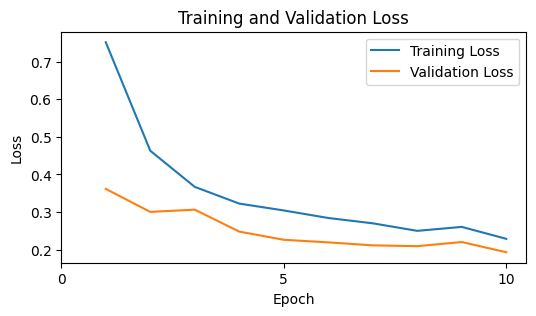

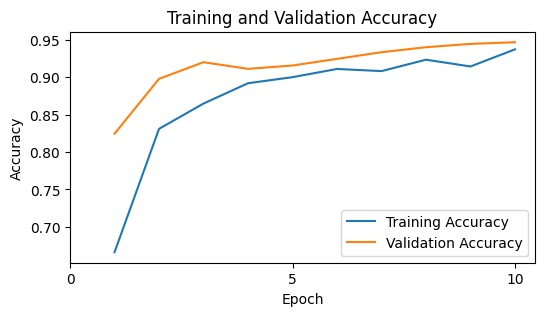

In [ ]:
plot_training_history()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrix():
    test_images = []
    test_labels = []

    for images, labels in test_ds:
        test_images.append(images)
        test_labels.append(labels)

    test_images = np.concatenate(test_images)
    test_labels = np.concatenate(test_labels)

    predictions = model.predict(test_images)
    predicted_classes = np.where(predictions > 0.5, 1, 0)

    cm = confusion_matrix(test_labels, predicted_classes)

    print(cm)

    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(cm.shape[0])
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    test_accuracy = accuracy_score(test_labels, predicted_classes)
    print("Test Accuracy:", test_accuracy)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step
[[206  19]
 [ 10 215]]
Test Accuracy: 0.9355555555555556


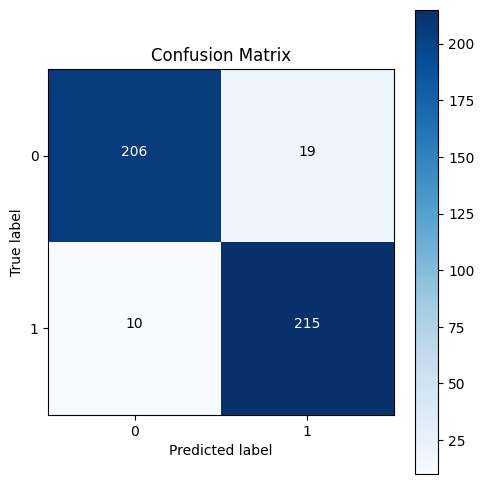

In [ ]:
plot_confusion_matrix()

In [ ]:
pm.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy(), AUC()]
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit (
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[early_stopping_callback]
)


Epoch 1/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 82s 644ms/step - auc_1: 0.7791 - binary_accuracy: 0.7484 - loss: 0.8078 - val_auc_1: 0.9490 - val_binary_accuracy: 0.9333 - val_loss: 0.1779
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 75s 588ms/step - auc_1: 0.9578 - binary_accuracy: 0.9402 - loss: 0.1787 - val_auc_1: 0.9542 - val_binary_accuracy: 0.9467 - val_loss: 0.1586
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 39s 586ms/step - auc_1: 0.9693 - binary_accuracy: 0.9569 - loss: 0.1177 - val_auc_1: 0.9344 - val_binary_accuracy: 0.9222 - val_loss: 0.2182
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 580ms/step - auc_1: 0.9794 - binary_accuracy: 0.9739 - loss: 0.0702 - val_auc_1: 0.9311 - val_binary_accuracy: 0.9178 - val_loss: 0.2467
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 584ms/step - auc_1: 0.9757 - binary_accuracy: 0.9699 - loss: 0.0785 - val_auc_1: 0.9433 - val_binary_accuracy: 0.9289 - val_loss: 0.2403
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 591ms/step - auc_1: 0.9831 - binary_accuracy: 0.9740 - loss: 0.

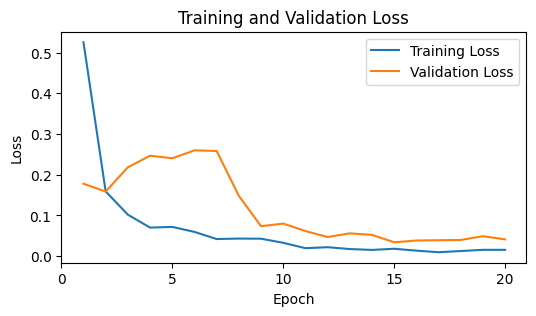

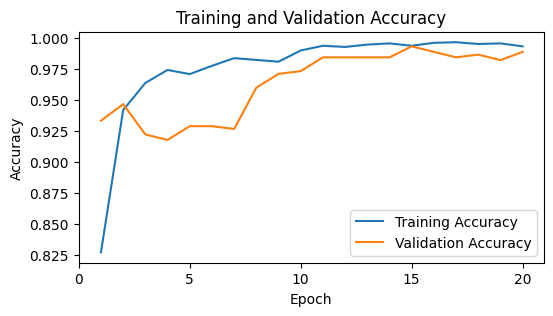

In [ ]:
plot_training_history()

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 290ms/step
[[222   3]
 [  2 223]]
Test Accuracy: 0.9888888888888889


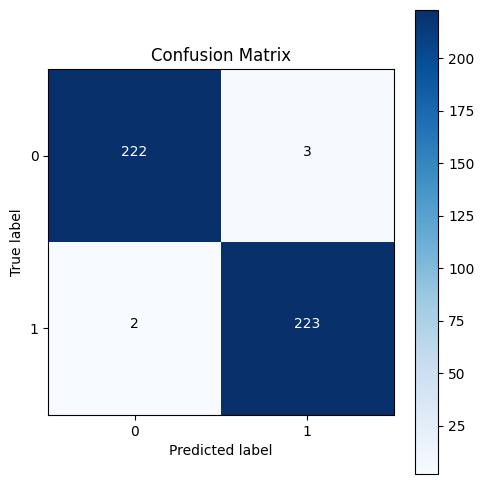

In [ ]:
plot_confusion_matrix()